In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42  # Use TrueType fonts
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5

In [28]:
import sys
import os
import pandas as pd
import numpy as np
from os.path import join as pjoin

from catrace.stats import sort_conditions, pool_training_conditions
from catrace.visualize import plot_measure, plot_all_measures

dataset_name = 'simulation'
config_file = f'../dataset_configs/{dataset_name}_dataset_rand_both.json'

In [29]:
import sys
import os
import pandas as pd
from os.path import join as pjoin

from catrace.dataset import DatasetConfig
from catrace.utils import load_config

from catrace.dataset import load_dataset_config
from catrace.dataset import load_dataset_config
dsconfig= load_dataset_config(config_file)

fig_dir = os.path.join('../figures', f'{dataset_name}')

capacity_dir = os.path.join(dsconfig.results_dir, 'capacity')
#data_version_tag = ''
data_version_tag = 'smallnet_v3'
window = [11, 29]
seed = 123
window_key = f'window_{window[0]}_{window[1]}'

jobname = f'capacity_{window_key}'
N = 1000
M=50

jobname = f'capacity_sweep_{window_key}_N{N}_M{M}_master_seed{seed}'


conditions = dsconfig.conditions

input_dir = pjoin(capacity_dir, jobname)
exp_list = dsconfig.exp_list

# If file exists, load it
df_result_file = pjoin(input_dir, f'df_result.pkl')
df_result = pd.read_pickle(df_result_file)

df_result_with_naive = df_result.reset_index(level='condition')
# Replace in condition "rand" by "naive"
df_result_with_naive['condition'] = df_result_with_naive['condition'].replace('rand', 'naive')
# set index again
df_result_with_naive = df_result_with_naive.set_index('condition', append=True)
df_result = df_result_with_naive


In [30]:


def rename_odor_index_levels(df_per_fish):
    df_per_fish.reset_index(level=['odor_0', 'odor_1'], inplace=True)
    # Rename columns odor_0 to odor1 and odor_1 to odor2
    df_per_fish.rename(columns={'odor_0': 'odor1', 'odor_1': 'odor2'}, inplace=True)
    # Set odor1 and odor2 as index
    df_per_fish.set_index(['odor1', 'odor2'], inplace=True, append=True)
    return df_per_fish

if 'odor_0' in df_result.index.names:
    df_per_fish_juv = df_result.xs(False, level='shuffle').groupby(['fish_id', 'condition', 'odor_0', 'odor_1'], sort=False).mean()
    df_per_fish_juv_shuffled = df_result.xs(True, level='shuffle').groupby(['fish_id', 'condition', 'odor_0', 'odor_1'], sort=False).mean()

    df_per_fish_juv = rename_odor_index_levels(df_per_fish_juv)
    df_per_fish_juv_shuffled = rename_odor_index_levels(df_per_fish_juv_shuffled)
else:
    df_per_fish_juv = df_result.xs(False, level='shuffle').groupby(['fish_id', 'condition', 'odor1', 'odor2'], sort=False).mean()
    df_per_fish_juv_shuffled = df_result.xs(True, level='shuffle').groupby(['fish_id', 'condition', 'odor1', 'odor2'], sort=False).mean()

juv_conditions =  ['naive', 'arg-phe', 'phe-arg', 'phe-trp']
cond_mapping = {'naive': 'naive', 'both_n':'trained'}
conditions_pooled = ['naive', 'trained']

df_pooled = pool_training_conditions(df_per_fish_juv, cond_mapping)

df_pooled_shuffled = pool_training_conditions(df_per_fish_juv_shuffled, cond_mapping)


In [31]:
df_pooled

capacity  dimension    radius   utility  \
fish_id   odor1 odor2 condition                                            
rand_A1   aa1   ba2   naive      0.067574  23.903438  1.117571  0.896601   
                ba3   naive      0.066536  24.231652  1.126072  0.901002   
          aa3   ba1   naive      0.069501  23.642119  1.100547  0.899756   
          aa2   aa3   naive      0.065672  24.162574  1.129292  0.888998   
          ba1   ba2   naive      0.053779  27.805879  1.246758  0.909617   
...                                   ...        ...       ...       ...   
both_n_D2 aa3   ba2   trained    0.070844  23.061658  1.092317  0.888467   
                ba3   trained    0.071996  22.682577  1.088912  0.885465   
          aa1   ba1   trained    0.072862  22.462345  1.091462  0.888998   
          aa2   ba1   trained    0.078275  20.378570  1.092925  0.867732   
          aa1   aa3   trained    0.074242  21.489886  1.090091  0.865947   

                                 center_alignment  axis_alignment  \
fish_id   odor1 odor2 condition                                     
rand_A1   aa1   ba2   naive              0.426950        0.042053   
                ba3   naive              0.452902        0.040979   
          aa3   ba1   naive              0.353027        0.037459   
          aa2   aa3   naive              0.568087        0.056180   
          ba1   ba2   naive              0.601474        0.048568   
...                                           ...             ...   
both_n_D2 aa3   ba2   trained            0.416789        0.041285   
                ba3   trained            0.410644        0.043437   
          aa1   ba1   trained            0.399252        0.042288   
          aa2   ba1   trained            0.374175        0.045781   
          aa1   aa3   trained            0.570018        0.067412   

                                 center_axis_alignment  additional_info  \
fish_id   odor1 odor2 condition                                           
rand_A1   aa1   ba2   naive                   0.174440              NaN   
                ba3   naive                   0.169731              NaN   
          aa3   ba1   naive                   0.166913              NaN   
          aa2   aa3   naive                   0.200551              NaN   
          ba1   ba2   naive                   0.166203              NaN   
...                                                ...              ...   
both_n_D2 aa3   ba2   trained                 0.180727              NaN   
                ba3   trained                 0.185650              NaN   
          aa1   ba1   trained                 0.185060              NaN   
          aa2   ba1   trained                 0.214256              NaN   
          aa1   aa3   trained                 0.236198              NaN   

                                 capacity_geometric_approx  \
fish_id   odor1 odor2 condition                              
rand_A1   aa1   ba2   naive                       0.075373   
                ba3   naive                       0.073856   
          aa3   ba1   naive                       0.077257   
          aa2   aa3   naive                       0.073881   
          ba1   ba2   naive                       0.059128   
...                                                    ...   
both_n_D2 aa3   ba2   trained                     0.079745   
                ba3   trained                     0.081314   
          aa1   ba1   trained                     0.081971   
          aa2   ba1   trained                     0.090235   
          aa1   aa3   trained                     0.085742   

                                 capacity_effective_approx  ...  \
fish_id   odor1 odor2 condition                             ...   
rand_A1   aa1   ba2   naive                       0.067574  ...   
                ba3   naive                       0.066536  ...   
          aa3   ba1   naive                       0.069501  ...   
          aa2   aa3   naive 

[('aa1', 'ba3'), ('aa2', 'ba1'), ('aa2', 'ba3'), ('ba2', 'ba3'), ('aa3', 'ba1'), ('aa1', 'aa3'), ('aa3', 'ba3'), ('aa1', 'aa2'), ('aa2', 'aa3'), ('aa1', 'ba2'), ('ba1', 'ba2'), ('ba1', 'ba3'), ('aa1', 'ba1'), ('aa2', 'ba2'), ('aa3', 'ba2')]
[('aa1', 'ba3'), ('aa2', 'ba1'), ('aa2', 'ba3'), ('ba2', 'ba3'), ('aa3', 'ba1'), ('aa1', 'aa3'), ('aa3', 'ba3'), ('aa1', 'aa2'), ('aa2', 'aa3'), ('aa1', 'ba2'), ('ba1', 'ba2'), ('ba1', 'ba3'), ('aa1', 'ba1'), ('aa2', 'ba2'), ('aa3', 'ba2')]


[('aa1', 'ba3'), ('aa2', 'ba1'), ('aa2', 'ba3'), ('ba2', 'ba3'), ('aa3', 'ba1'), ('aa1', 'aa3'), ('aa3', 'ba3'), ('aa1', 'aa2'), ('aa2', 'aa3'), ('aa1', 'ba2'), ('ba1', 'ba2'), ('ba1', 'ba3'), ('aa1', 'ba1'), ('aa2', 'ba2'), ('aa3', 'ba2')]
[('aa1', 'ba3'), ('aa2', 'ba1'), ('aa2', 'ba3'), ('ba2', 'ba3'), ('aa3', 'ba1'), ('aa1', 'aa3'), ('aa3', 'ba3'), ('aa1', 'aa2'), ('aa2', 'aa3'), ('aa1', 'ba2'), ('ba1', 'ba2'), ('ba1', 'ba3'), ('aa1', 'ba1'), ('aa2', 'ba2'), ('aa3', 'ba2')]
[('aa1', 'ba3'), ('aa2', 'ba1'), ('aa2', 'ba3'), ('ba2', 'ba3'), ('aa3', 'ba1'), ('aa1', 'aa3'), ('aa3', 'ba3'), ('aa1', 'aa2'), ('aa2', 'aa3'), ('aa1', 'ba2'), ('ba1', 'ba2'), ('ba1', 'ba3'), ('aa1', 'ba1'), ('aa2', 'ba2'), ('aa3', 'ba2')]
[('aa1', 'ba3'), ('aa2', 'ba1'), ('aa2', 'ba3'), ('ba2', 'ba3'), ('aa3', 'ba1'), ('aa1', 'aa3'), ('aa3', 'ba3'), ('aa1', 'aa2'), ('aa2', 'aa3'), ('aa1', 'ba2'), ('ba1', 'ba2'), ('ba1', 'ba3'), ('aa1', 'ba1'), ('aa2', 'ba2'), ('aa3', 'ba2')]
[('aa1', 'ba3'), ('aa2', 'ba1'), ('a

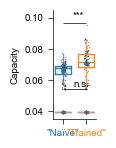

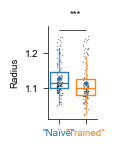

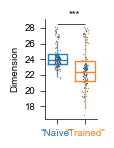

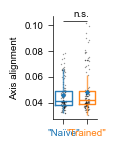

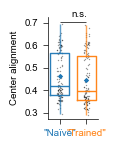

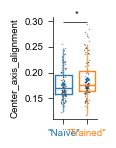

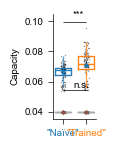

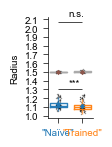

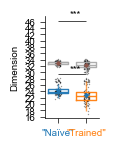

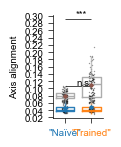

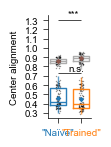

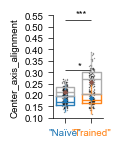

In [32]:
from catrace.for_paper import save_figure_for_paper, save_stats_json
from catrace.capacity_utils import plot_cap_and_save
from catrace.visualize import PlotBoxplotParams


plot_measure_params = PlotBoxplotParams(
    figsize=(1.2, 1.55),
    y_tick_label_fontsize=7,
    x_tick_label_fontsize=6,
    box_linewidth=1,
    box_width=0.7,
    mean_marker_size=0.7,
    strip_size=1.0,
    pvalue_bar_linewidth=0.5,
    box_colors=['tab:blue', 'tab:orange'],
    do_capitalize_labels=True,
    mean_marker_color='tab:blue',
    ylevel_scale = 1.08
)

capacity_ylim = (0.035, 0.105)
#tick_intervals = [0.02, 0.1, 5, 0.02, 0.2, 0.05]
tick_intervals = [0.02, 0.1, 2, 0.02, 0.1, 0.05]
juv_pooled_conditions = ['naive', 'trained']

vsname = 'all_vs_all'
odor1_group = ['aa1', 'aa2', 'aa3', 'ba1', 'ba2', 'ba3']
odor2_group = ['aa1', 'aa2', 'aa3', 'ba1', 'ba2', 'ba3']
xtick_labels = ['"Naïve"', '"Trained"']

test_results_dict = plot_cap_and_save(vsname, odor1_group, odor2_group,
                    df_pooled,
                    df_pooled_shuffled,
                    juv_pooled_conditions,
                    dataset_name,
                    fig_dir,
                    plot_measure_params,
                    tick_intervals,
                    capacity_ylim=capacity_ylim,
                    capacity_ylevel_scale=1.045,
                    do_save=True,
                    xtick_labels=xtick_labels)


test_results_dict = plot_cap_and_save(vsname, odor1_group, odor2_group,
                    df_pooled,
                    df_pooled_shuffled,
                    juv_pooled_conditions,
                    dataset_name,
                    fig_dir,
                    plot_measure_params,
                    tick_intervals,
                    capacity_ylim=capacity_ylim,
                    do_save=True,
                    do_plot_shuffled_measure=True,
                    xtick_labels=xtick_labels)

In [33]:
from catrace.stats import format_test_results_pair


def format_capacity_test_results_dict(test_results_dict):
    for measure_name, test_results in test_results_dict.items():
        print(measure_name)

        print(format_test_results_pair(test_results['raw']))
        if 'shuffled' in test_results:
            print('shuffled')
            print(format_test_results_pair(test_results['shuffled']))

format_capacity_test_results_dict(test_results_dict)

capacity
Comparing naive (mean = 0.0661 ± 0.00540, n = 120) vs trained (mean = 0.0713 ± 0.00875, n = 120): Mann–Whitney U test, U = 3757.00, P = 1.5 × 10^-10.
shuffled
Comparing naive (mean = 0.0397 ± 0.000109, n = 120) vs trained (mean = 0.0397 ± 0.000110, n = 120): Mann–Whitney U test, U = 6540.00, P = 0.220.
radius
Comparing naive (mean = 1.13 ± 0.0460, n = 120) vs trained (mean = 1.11 ± 0.0528, n = 120): Mann–Whitney U test, U = 9217.00, P = 0.0002.
shuffled
Comparing naive (mean = 1.50 ± 0.00488, n = 120) vs trained (mean = 1.50 ± 0.00701, n = 120): Mann–Whitney U test, U = 6306.00, P = 0.097.
dimension
Comparing naive (mean = 24.37 ± 1.52, n = 120) vs trained (mean = 22.85 ± 2.51, n = 120): Mann–Whitney U test, U = 10799.00, P = 2.2 × 10^-11.
shuffled
Comparing naive (mean = 33.03 ± 0.52, n = 120) vs trained (mean = 32.36 ± 1.04, n = 120): Mann–Whitney U test, U = 9881.00, P = 6.2 × 10^-7.
axis_alignment
Comparing naive (mean = 0.0458 ± 0.0112, n = 120) vs trained (mean = 0.0483 

### AvsA, AvsB, BvsB


In [34]:
# vsdict = {
#     'AvsA': (['Phe', 'Trp', 'Arg'], ['Phe', 'Trp', 'Arg']),
#     'AvsB': (['Phe', 'Trp', 'Arg'], ['TDCA', 'TCA', 'GCA']),
#     'BvsB': (['TDCA', 'TCA', 'GCA'], ['TDCA', 'TCA', 'GCA']),
# }
vsdict = {
    'AvsA': (['aa1', 'aa2', 'aa3'], ['aa1', 'aa2', 'aa3']),
    'AvsB': (['aa1', 'aa2', 'aa3'], ['ba1', 'ba2', 'ba3']),
    'BvsB': (['ba1', 'ba2', 'ba3'], ['ba1', 'ba2', 'ba3']),
}
from catrace.capacity_utils import get_per_vs
vsdff = get_per_vs(vsdict, df_pooled)
vsdff


[('aa1', 'aa2'), ('aa2', 'aa3'), ('aa1', 'aa3')]
[('aa1', 'ba3'), ('aa2', 'ba1'), ('aa2', 'ba3'), ('aa3', 'ba1'), ('aa3', 'ba3'), ('aa1', 'ba2'), ('aa1', 'ba1'), ('aa2', 'ba2'), ('aa3', 'ba2')]
[('ba1', 'ba3'), ('ba1', 'ba2'), ('ba2', 'ba3')]


capacity  dimension    radius  \
vsname fish_id   odor1 odor2 condition                                  
AvsA   rand_A1   aa2   aa3   naive      0.065672  24.162574  1.129292   
                 aa1   aa2   naive      0.063138  24.675194  1.147257   
                       aa3   naive      0.066035  23.881231  1.130783   
       rand_A2   aa2   aa3   naive      0.064615  24.246651  1.142885   
                 aa1   aa2   naive      0.070149  22.853860  1.098344   
...                                          ...        ...       ...   
BvsB   both_n_D1 ba1   ba3   trained    0.062455  25.339312  1.152729   
                 ba2   ba3   trained    0.058306  26.423988  1.196507   
       both_n_D2 ba1   ba2   trained    0.054818  27.738432  1.224795   
                       ba3   trained    0.060044  26.240454  1.167323   
                 ba2   ba3   trained    0.056628  26.933512  1.210743   

                                         utility  center_alignment  \
vsname fish_id   odor1 odor2 condition                               
AvsA   rand_A1   aa2   aa3   naive      0.888998          0.568087   
                 aa1   aa2   naive      0.884897          0.628995   
                       aa3   naive      0.884459          0.581851   
       rand_A2   aa2   aa3   naive      0.886929          0.600269   
                 aa1   aa2   naive      0.876229          0.549231   
...                                          ...               ...   
BvsB   both_n_D1 ba1   ba3   trained    0.902665          0.547724   
                 ba2   ba3   trained    0.906776          0.615282   
       both_n_D2 ba1   ba2   trained    0.912054          0.602972   
                       ba3   trained    0.908317          0.497145   
                 ba2   ba3   trained    0.906256          0.613051   

                                        axis_alignment  center_axis_alignment  \
vsname fish_id   odor1 odor2 condition                                          
AvsA   rand_A1   aa2   aa3   naive            0.056180               0.200551   
                 aa1   aa2   naive            0.063062               0.214118   
                       aa3   naive            0.061476               0.213181   
       rand_A2   aa2   aa3   naive            0.059315               0.206247   
                 aa1   aa2   naive            0.063890               0.221150   
...                                                ...                    ...   
BvsB   both_n_D1 ba1   ba3   trained          0.047901               0.176666   
                 ba2   ba3   trained          0.051483               0.178799   
       both_n_D2 ba1   ba2   trained          0.046769               0.166639   
                       ba3   trained          0.041907               0.161817   
                 ba2   ba3   trained          0.050042               0.178254   

                                        additional_info  \
vsname fish_id   odor1 odor2 condition                    
AvsA   rand_A1   aa2   aa3   naive                  NaN   
                 aa1   aa2   naive                  NaN   
                       aa3   naive                  NaN   
       rand_A2   aa2   aa3   naive                  NaN   
                 aa1   aa2   naive                  NaN   
...                                                 ...   
BvsB   both_n_D1 ba1   ba3   trained                NaN   
                 ba2   ba3   trained                NaN   
       both_n_D2 ba1   ba2   trained                NaN   
                       ba3   trained                NaN   
                 ba2   ba3   trained                NaN   

                                        capacity_geometric_approx  \
vsname fish_id   odor1 odor2 condition                              
AvsA   rand_A1   aa2   aa3   naive                       0.073881   
                 aa1   aa2   naive                       0.071363   
                       aa3   naive                       0.074668   
       rand_

In [35]:
vsdff_naive = vsdff.xs('naive', level='condition')
vsdff_trained = vsdff.xs('trained', level='condition')
vsdff_naive
measure_name = 'capacity'
from catrace.stats import apply_test_by_cond
vs_test_naive = apply_test_by_cond(vsdff_naive, measure_name, cond_name='vsname', return_all_pairs=True)
vs_test_trained = apply_test_by_cond(vsdff_trained, measure_name, cond_name='vsname', return_all_pairs=True)
from catrace.stats import format_test_results_by_cond
sentence = format_test_results_by_cond(vs_test_naive)
print('naive')
print(sentence)
from catrace.stats import format_test_results_by_cond
sentence = format_test_results_by_cond(vs_test_trained)
print('trained')
print(sentence)

  Contrast     A     B  Paired  Parametric          T        dof alternative  \
0   vsname  AvsA  AvsB   False        True  -6.123374  40.725285   two-sided   
1   vsname  AvsA  BvsB   False        True  14.049698  46.000000   two-sided   
2   vsname  AvsB  BvsB   False        True  24.840458  48.964730   two-sided   

          p-unc       BF10   hedges  
0  2.962052e-07  4.571e+05 -1.40616  
1  2.950578e-18  1.003e+15  3.98931  
2  2.077278e-29  2.141e+39  5.19343  
  Contrast     A     B  Paired  Parametric          T        dof alternative  \
0   vsname  AvsA  AvsB   False        True   0.849111  31.233692   two-sided   
1   vsname  AvsA  BvsB   False        True  12.526488  46.000000   two-sided   
2   vsname  AvsB  BvsB   False        True  23.401050  86.088285   two-sided   

          p-unc       BF10    hedges  
0  4.022811e-01      0.331  0.234068  
1  1.980248e-16  1.748e+13  3.556806  
2  4.441634e-39  1.828e+37  3.858740  
naive
(Kruskal–Wallis test, n = 120, d.f. = 2, H =

In [ ]:
from catrace.stats import format_test_results_multi_odor_two_cond
sentence = format_test_results_multi_odor_two_cond(test_results)
print(sentence)


For AvsA, Comparing naive (mean = 0.06581 ± 0.002373, n = 24) vs trained (mean = 0.07655 ± 0.007163, n = 24): Mann–Whitney U test, U = 18.00, P = 2.7 × 10^-8. For AvsB, Comparing naive (mean = 0.06924 ± 0.002479, n = 72) vs trained (mean = 0.07477 ± 0.005043, n = 72): Mann–Whitney U test, U = 772.00, P = 3.6 × 10^-13. For BvsB, Comparing naive (mean = 0.05689 ± 0.001933, n = 24) vs trained (mean = 0.05707 ± 0.002163, n = 24): Mann–Whitney U test, U = 276.00, P = 0.813.


In [ ]:
def compute_vsdff_percent(vsdff):
    vsdff_percent = vsdff.copy()
    # for each vsname, compute the mean of the naive condition
    for vsname, group in vsdff_percent.groupby('vsname'):
        naive_mean = group.xs('naive', level='condition').mean()
        # Divide all values by the naive mean
        vsdff_percent.loc[group.index] = group / naive_mean * 100
    return vsdff_percent

vsdff_percent = compute_vsdff_percent(vsdff)

In [ ]:
from catrace.stats import format_test_results_multi_odor_two_cond
sentence = format_test_results_multi_odor_two_cond(test_results)
print(sentence)

For AvsA, Comparing naive (mean = 100.0 ± 3.605, n = 24) vs trained (mean = 116.3 ± 10.88, n = 24): Mann–Whitney U test, U = 18.00, P = 2.7 × 10^-8. For AvsB, Comparing naive (mean = 100.0 ± 3.580, n = 72) vs trained (mean = 108.0 ± 7.283, n = 72): Mann–Whitney U test, U = 772.00, P = 3.6 × 10^-13. For BvsB, Comparing naive (mean = 100.0 ± 3.398, n = 24) vs trained (mean = 100.3 ± 3.803, n = 24): Mann–Whitney U test, U = 276.00, P = 0.813.
